# Loan Application Status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes
details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1. Loan_ID - This refer to the unique identifier of the applicant&#39;s affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which
applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic
instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner
of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant&#39;s use
under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that
participate in the loan application process alongside the main applicant use under State
law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the
applicant
11. Credit History - This refers to a record of applicant&#39;s ability to repay debts and
demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set
out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan
requested.
You have to build a model that can predict whether the loan of the applicant will be
approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link- https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [3]:
# read the data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
# Checking the first 5 columns of the dataframe. 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Checking the last columns of the data.
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# to check the shape of the dataframe. 
df.shape

(614, 13)

In [7]:
# printing the no. of columns and rows.
print('The number of columns   ',df.shape[1])
print('The number of rows  ',df.shape[0])

The number of columns    13
The number of rows   614


In [8]:
# checking the number of null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

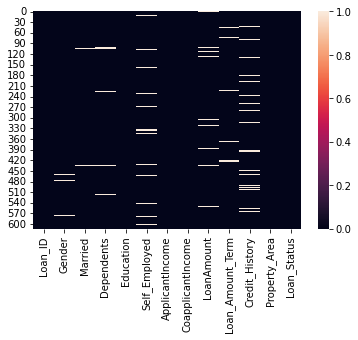

In [9]:
# Representing the missing values on the map. 
sns.heatmap(df.isnull())

In [10]:
# adding columns to the list 
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [11]:
#To check the data type. 
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
#There are three types of data in the provided data set(object,int64,float64)

In [13]:
# seeking information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# dropping the column
df = df.drop('Loan_ID', axis=1)

In [15]:
# The missing data has to be filled in order to proceed with the further steps.

In [16]:
# to check the unique values in the dataframe.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    print("\n")

Unique values in Gender: ['Male' 'Female' nan]


Unique values in Married: ['No' 'Yes' nan]


Unique values in Dependents: ['0' '1' '2' '3+' nan]


Unique values in Education: ['Graduate' 'Not Graduate']


Unique values in Self_Employed: ['No' 'Yes' nan]


Unique values in ApplicantIncome: [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  20

In [17]:
# Checking the number of values in each category of the Target variable. 
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The dataframe is considered to be unbalance, hence has to be treated. 

In [18]:
# Checking the unique values of the dataframe.
unique_values = df.nunique().to_frame("No. of unique value")

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
# seperating the categorical and the numerical data. 

categorical_col = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns :  ",categorical_col)
print("\n")

numerical_col = df.select_dtypes(exclude=['object']).columns.tolist()
print("Numerical Columns :  ",numerical_col)
print("\n")


Categorical Columns :   ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns :   ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [21]:
# Giving the command to check if the dropped column has been dropped or not. 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
#Columns with missing values :
#LoanAmount, Loan_Amount_Term,Credit_History, Gender, Dependents, Married, Credit_History,Loan_Amount_Term, LoanAmount and Self_Employed.

In [23]:
# replacing the nan values
df.replace('nan', np.NaN, inplace=True)

In [24]:
# Replacing the missing values in the Numerical Columns using the mean method  : LoanAmount, 
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [25]:
# Repacing the categorical values with the mode im the dataframe. 
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [26]:
# Changing the data type. 
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

In [27]:
# to check the working of the above coddes after treating the null values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int32  
 9   Credit_History     614 non-null    int32  
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 52.9+ KB


In [28]:
# to  identify the unique values in the feature
df['Credit_History'].unique()

array([1, 0])

In [29]:
# to  identify the unique values in the feature
df['Loan_Amount_Term'].unique()

array([360, 120, 240, 180,  60, 300, 480,  36,  84,  12])

In [30]:
# to study the dataframe into detail 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Y    422
N    192
Name: Loan_Status, dtype: int64


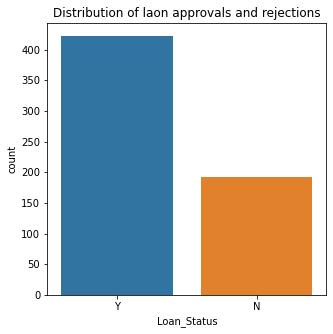

In [31]:
# The division of 
plt.figure(figsize=(5, 5))
sns.countplot(x='Loan_Status', data= df)
plt.title('Distribution of laon approvals and rejections')
print(df['Loan_Status'].value_counts())
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


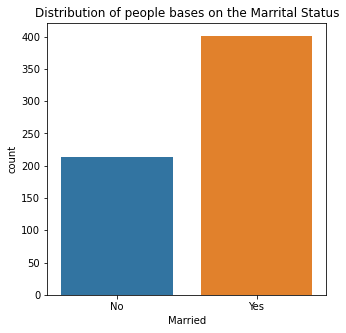

In [32]:
# The distribution of the people based on the Marrital Status. 
plt.figure(figsize=(5, 5))
sns.countplot(x='Married', data= df)
plt.title('Distribution of people bases on the Marrital Status')
print(df['Married'].value_counts())
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


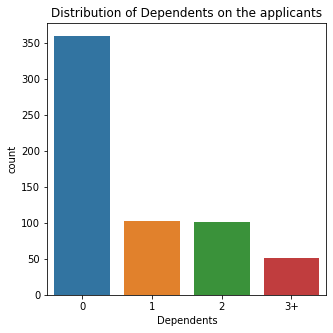

In [33]:
#The distribution of the people based on the Dependents. 
plt.figure(figsize=(5, 5))
sns.countplot(x='Dependents', data= df)
plt.title('Distribution of Dependents on the applicants')
print(df['Dependents'].value_counts())
plt.show()

It is observed that most of the loan applicants doesnot have any dependents. 

No     532
Yes     82
Name: Self_Employed, dtype: int64


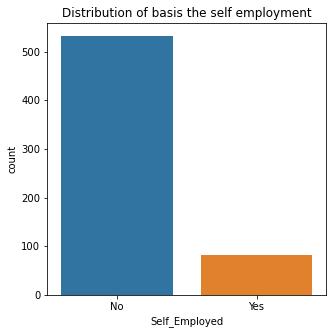

In [34]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Self_Employed', data= df)
plt.title('Distribution of basis the self employment')
print(df['Self_Employed'].value_counts())
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


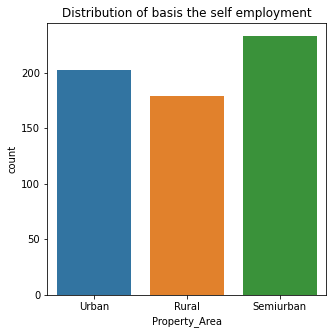

In [35]:

plt.figure(figsize=(5, 5))
sns.countplot(x='Property_Area', data= df)
plt.title('Distribution of basis the self employment')
print(df['Property_Area'].value_counts())
plt.show()

In [36]:
#Most of the applicants are from the Semiurban areas. 

Y    422
N    192
Name: Loan_Status, dtype: int64


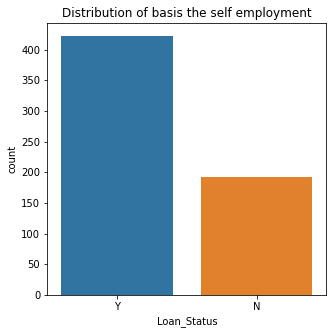

In [37]:
#Plotting based on theLoan_Status
plt.figure(figsize=(5, 5))
sns.countplot(x='Loan_Status', data= df)
plt.title('Distribution of basis the self employment')
print(df['Loan_Status'].value_counts())
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

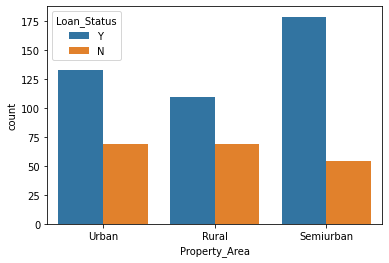

In [38]:
# Relationship between Loan Status and the Property_Area
sns.countplot('Property_Area',hue='Loan_Status',data= df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

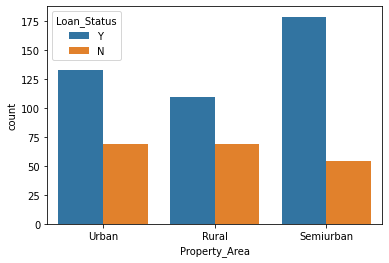

In [39]:
# further categorising of Property based basis (feature - Married)
sns.countplot('Property_Area',hue='Loan_Status',data= df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

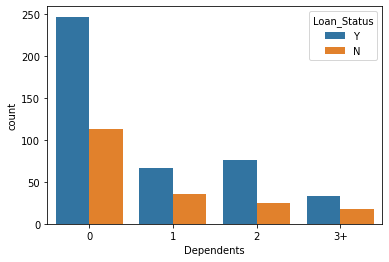

In [39]:
sns.countplot('Dependents',hue='Loan_Status',data= df)

<AxesSubplot:xlabel='Education', ylabel='count'>

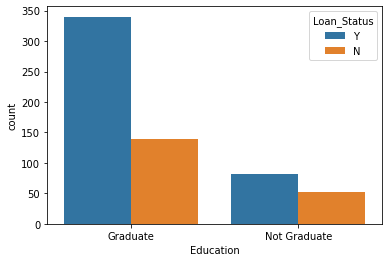

In [40]:
#Education
sns.countplot('Education',hue='Loan_Status',data= df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

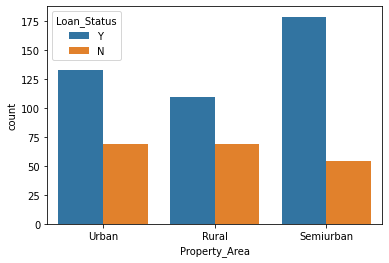

In [41]:
# Property Area
sns.countplot('Property_Area',hue='Loan_Status',data= df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

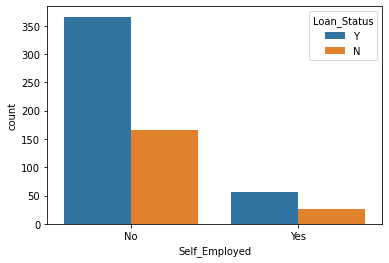

In [42]:

#Self_Employed
sns.countplot('Self_Employed',hue='Loan_Status',data= df)

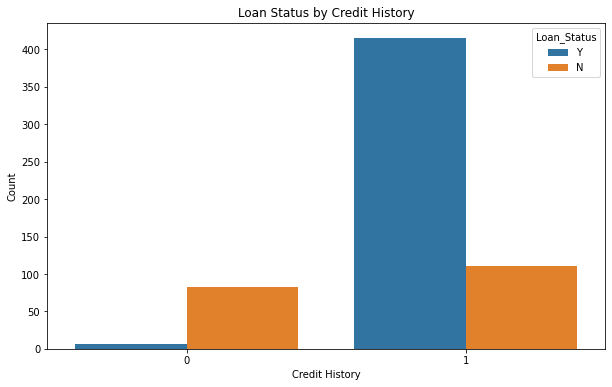

In [43]:
# Relationship of Credit_History & Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

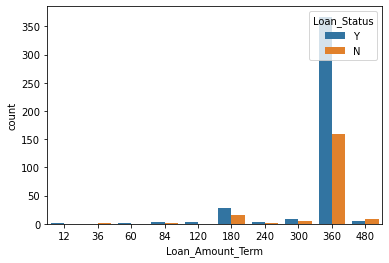

In [44]:
# further categorising of Property based basis (feature - Married)
sns.countplot('Loan_Amount_Term',hue='Loan_Status',data= df)

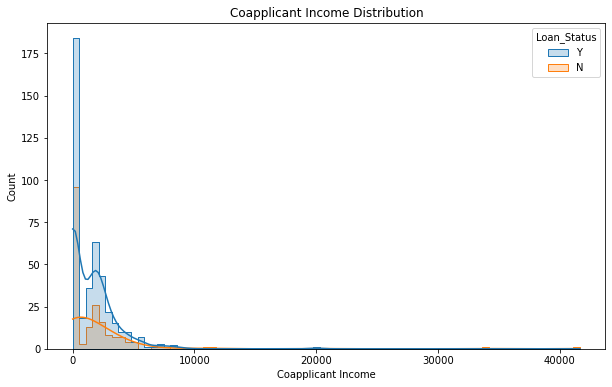

In [45]:
# Relationship between Loan Status and Coapplicant Income.  
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="CoapplicantIncome", hue="Loan_Status", kde=True, element="step")
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')
plt.show()

# Observartion: 
- There are no null values presesnt in the dataframe. 
- It is noticed that there is a huge gap in the 75percentile value and the values under the max category in the Applicants income, Coapplicants Income, Loan Amount. 
- We can predict that outliers are present in the dataframe as the min income for the Coapplicant income is 0 and there is a huge gap b/w min and max value. 
-It isobserved that median is higher than mean in Applicant income,CoapplicantIncome,LoanAmount therefore we consider this to be right skewed. 

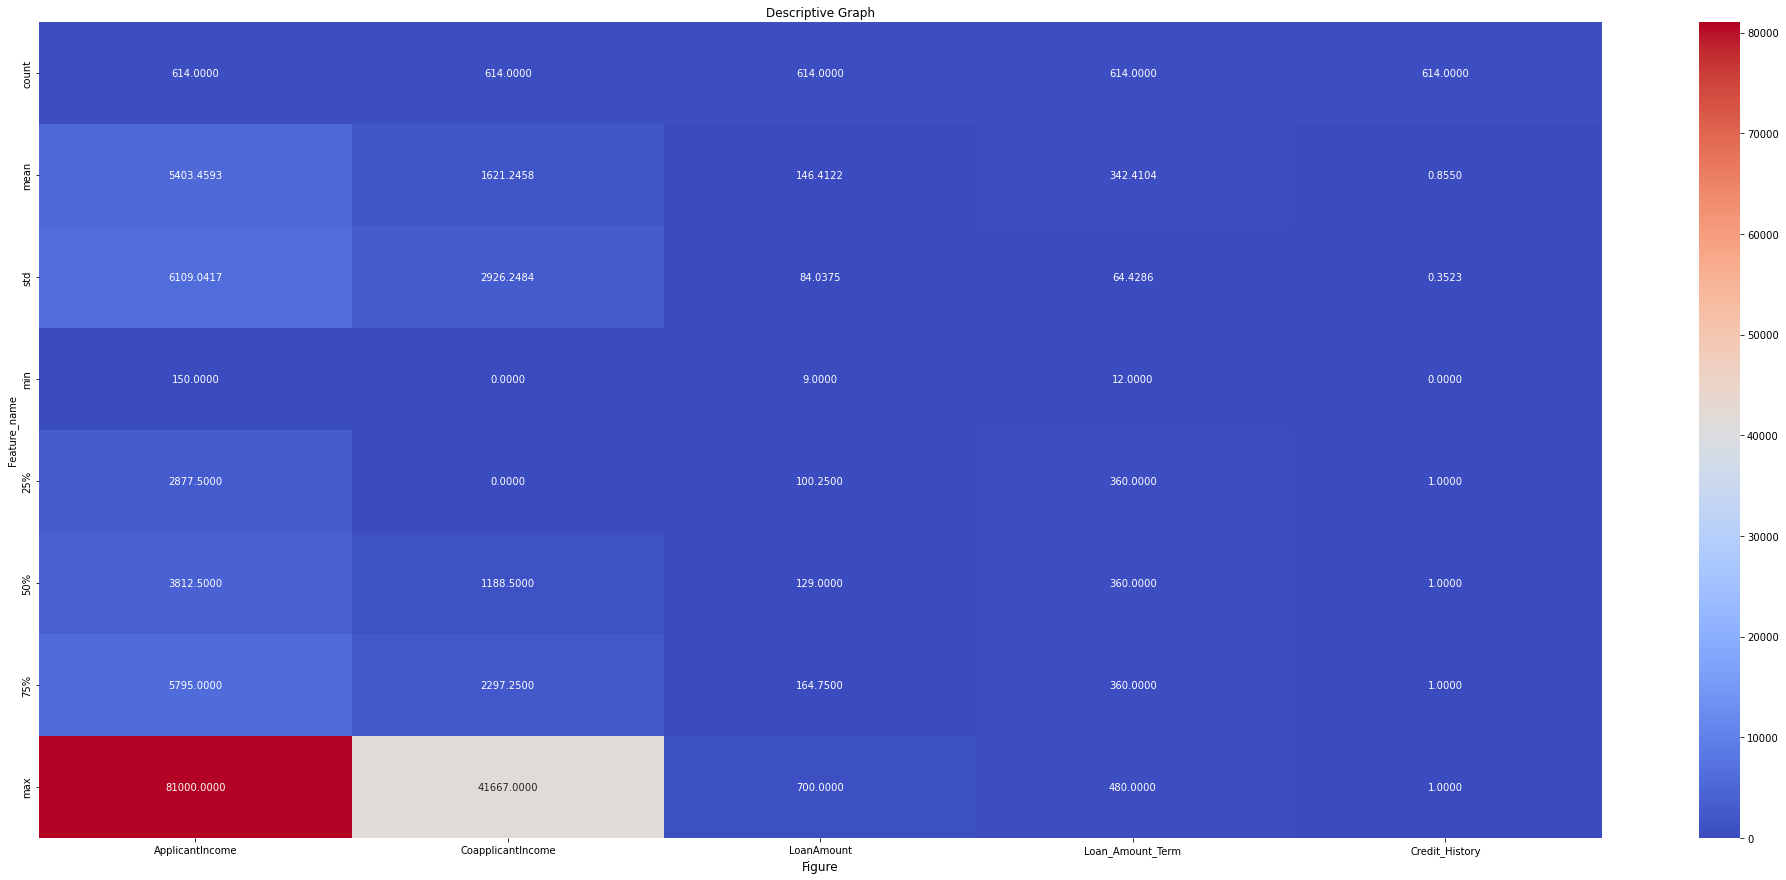

In [46]:
# Plotting the value of the describe feature on the plot 
plt.figure(figsize=(35,15))
sns.heatmap(df.describe(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.4f")
plt.xlabel('Figure', fontsize=12)
plt.ylabel('Feature_name')
plt.title('Descriptive Graph')
plt.show()

In [47]:
# Separating the label and the target variable. 
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [48]:
# to analyse the correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


In [49]:
# to evaluate the skewness in the dataframe.
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Considering the size of the dataset we shall proceed with the removing the features. We shall proceed with remoiving the outliers using the z score. 

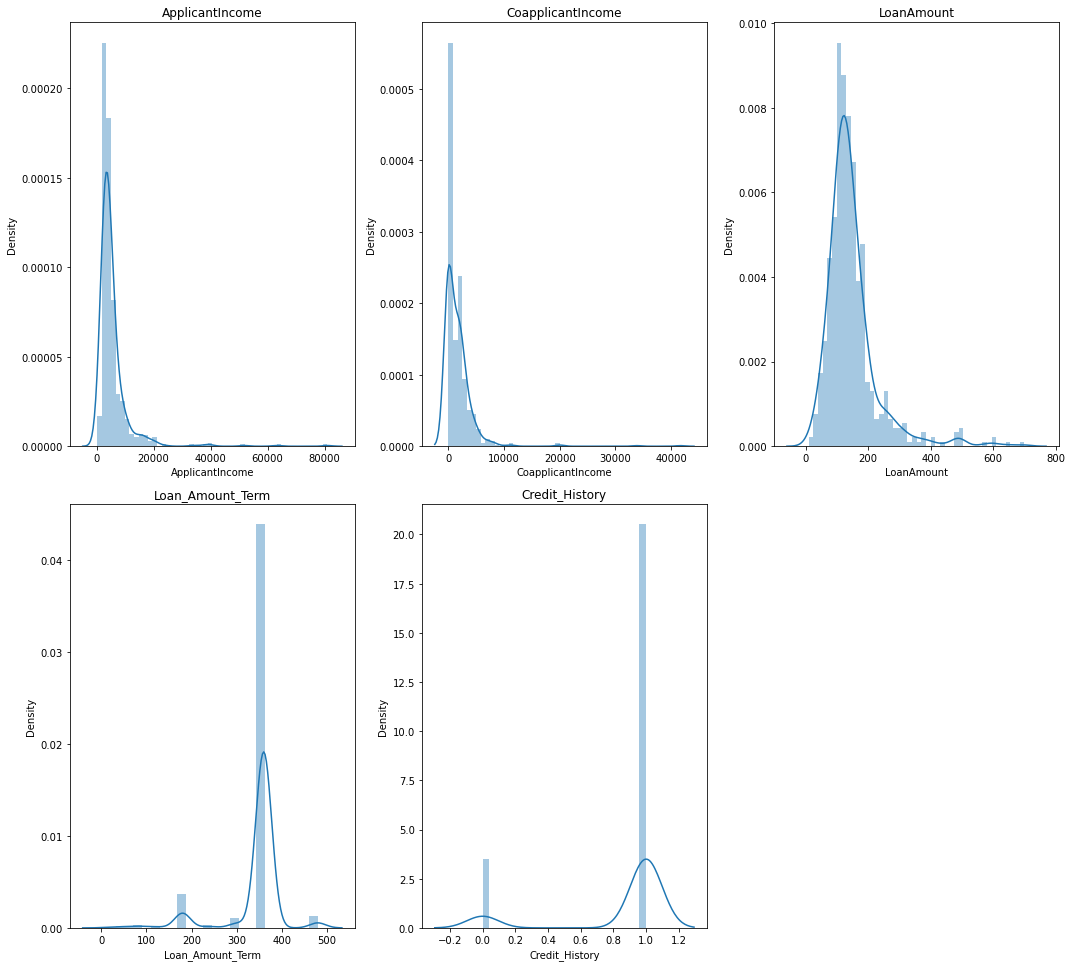

In [50]:


# Distribution of the numerical_col:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plt.title(numerical_feature)
    plotnumber += 1
plt.tight_layout()
plt.show()


The data is observed to be have skewness both in categorical as well as continous data, regardless we shall proceed with removing the skewness from the continous data.  
- CoapplicantIncome    7.491531
- ApplicantIncome      6.539513
- LoanAmount           2.726601


We will proceed by treating the below features as the categorical column since they have limited unique value.
- Loan_Amount_Term    -2.362414
- Credit_History      -1.882361 [[ 1.  0 ]

In [51]:
import pandas as pd
from scipy.stats import yeojohnson
# creating the a dataframe for the columns with skewness. 
skew_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# trying to apply the Yeo-Johnson transformation method to the above df. 
for cols in skew_cols:
    df[cols], _ = yeojohnson(df[cols])

# Check the skewness after transformation
print(df[skew_cols].skew())

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
dtype: float64


The skewess has been brought with the permissible limits i.e -0.5 to + 0.5. 

In [52]:
df.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

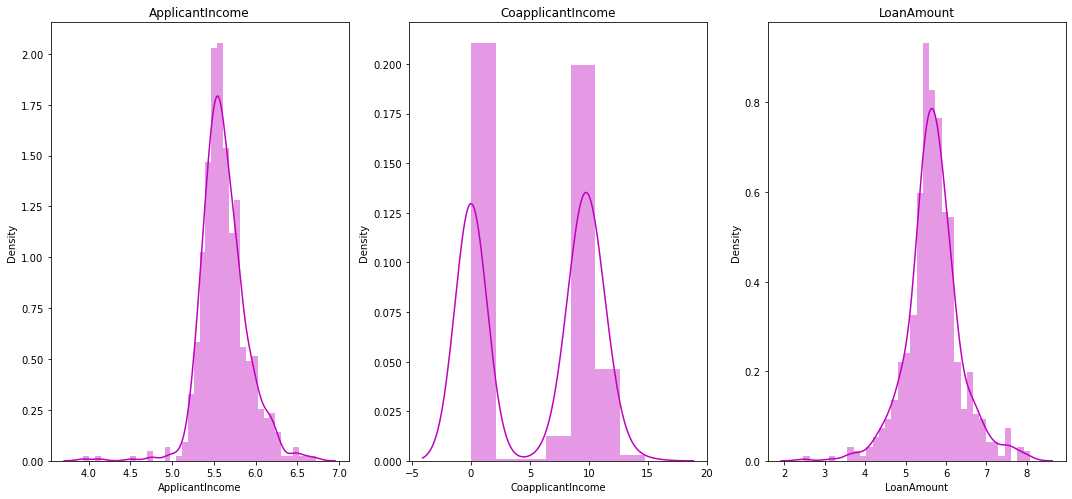

In [53]:
# Checking the skewness in the skew_cols
# Distribution of the numerical_col:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for skew_feature in skew_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[skew_feature], color='m')
    plt.xlabel(skew_feature)
    plt.title(skew_feature)
    plotnumber += 1
plt.tight_layout()
plt.show()

The graphs represents the the skewness has been worked upon. 

In [54]:
#Encoding the rest of the data in order to get the readable values to train the model. 
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [55]:
# Checking the functionality of the above codes. 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5.768597,0.000000,5.845650,360,1,2,1
1,1,1,1,0,0,5.666179,9.149313,5.664964,360,1,0,0
2,1,1,0,0,1,5.482132,0.000000,4.798975,360,1,2,1
3,1,1,0,1,0,5.415221,9.845889,5.578787,360,1,2,1
4,1,0,0,0,0,5.779154,0.000000,5.794843,360,1,2,1


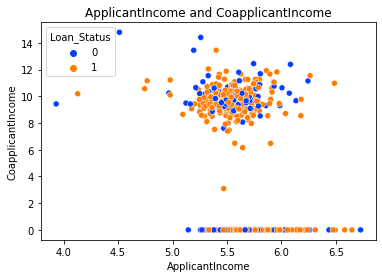

In [56]:
# comparing ApplicantIncome and CoapplicantIncome.
plt.title('ApplicantIncome and CoapplicantIncome')
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=df, hue='Loan_Status', palette = 'bright')
plt.show()

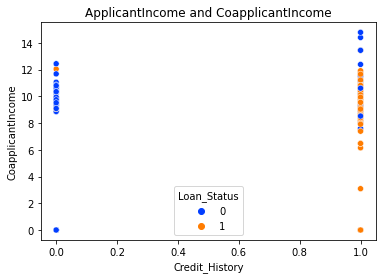

In [57]:
plt.title('ApplicantIncome and CoapplicantIncome')
sns.scatterplot(x='Credit_History', y='CoapplicantIncome', data=df, hue='Loan_Status', palette = 'bright')
plt.show()

In [58]:
# It is observed that the people with 1 as the credit has maximum chance of loan approval. 

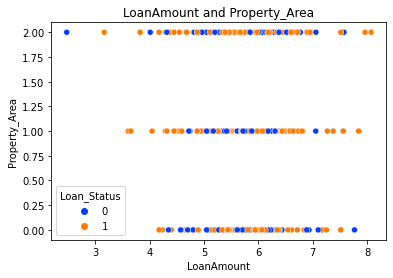

In [59]:
#LoanAmount and Property_Area
plt.title('LoanAmount and Property_Area')
sns.scatterplot(x='LoanAmount', y='Property_Area', data=df, hue='Loan_Status', palette = 'bright')
plt.show()

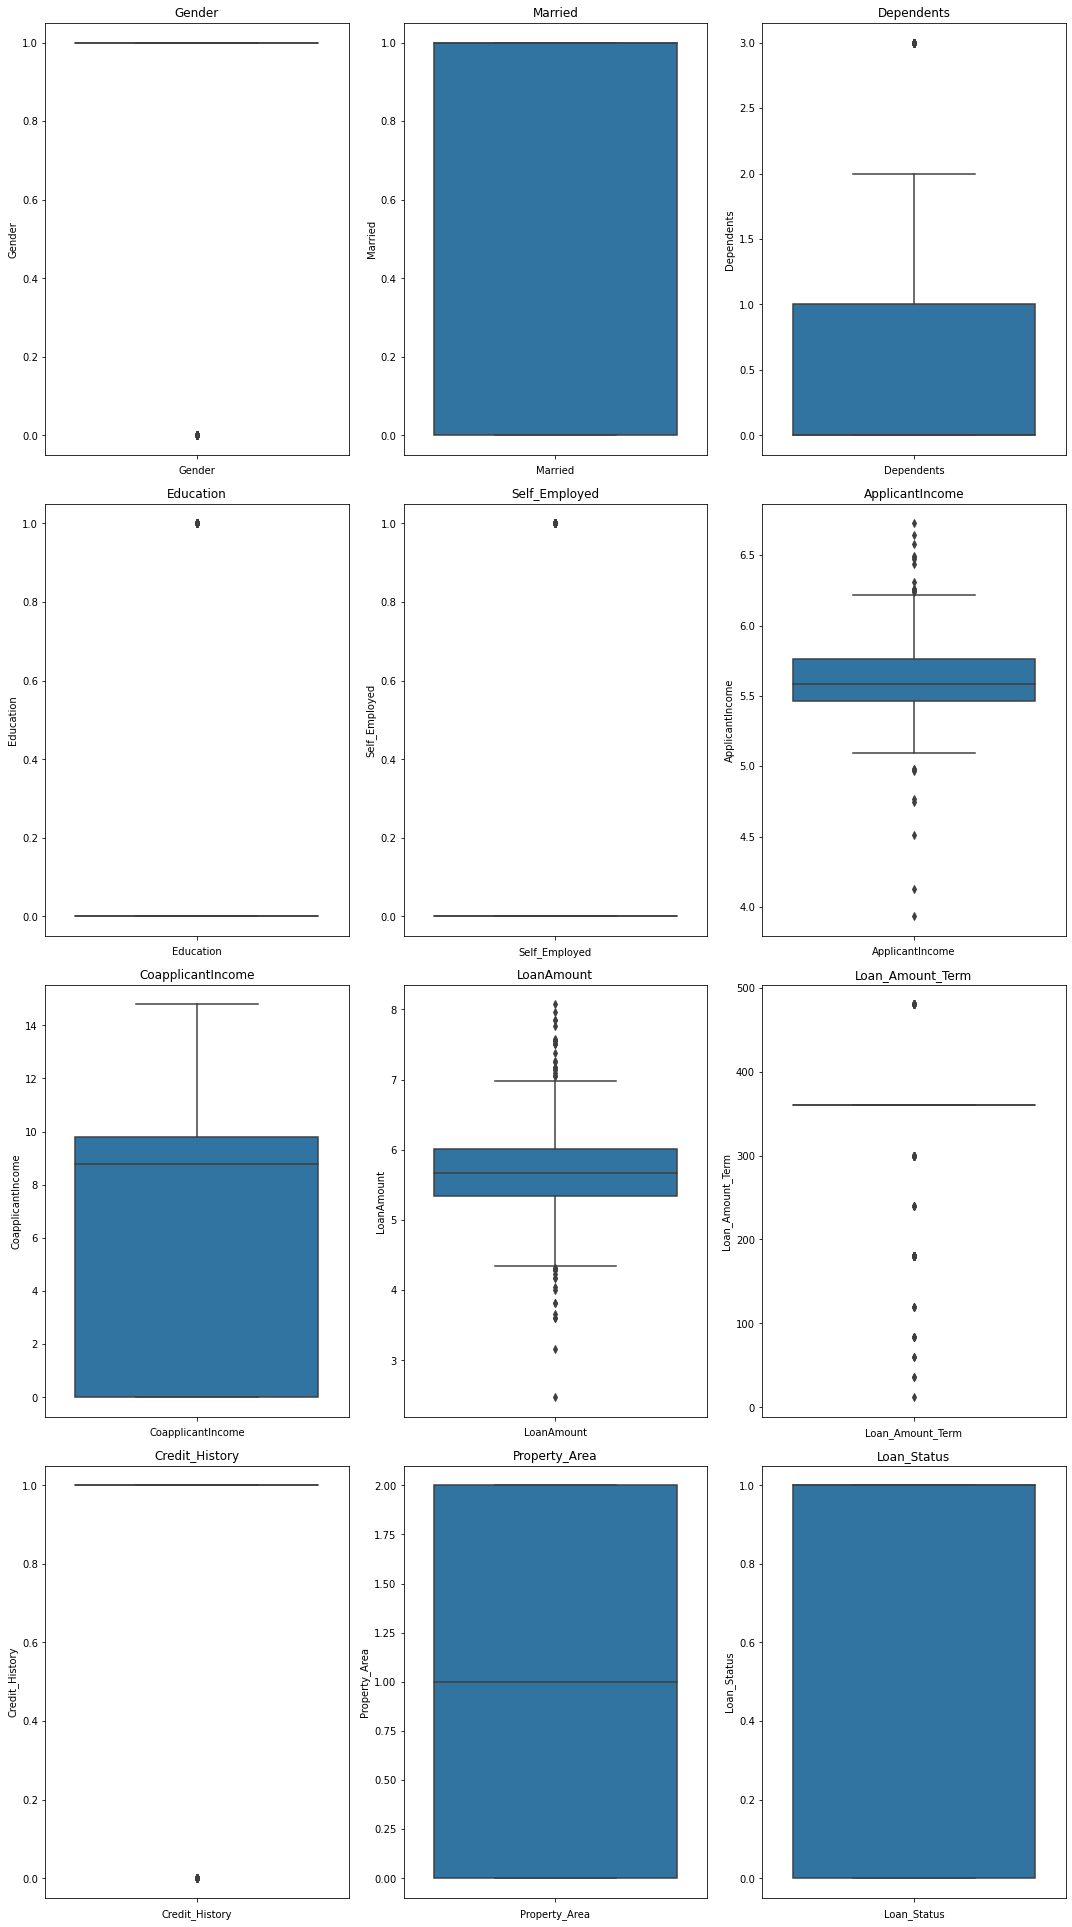

In [60]:
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df.columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(y=df[feature]) 
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [61]:
#Removing the outlier using Z Score method. 
skew_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'] 
Z = np.abs(zscore(df[skew_cols]))

In [62]:
threshold = 3
print(np.where(Z>3))

(array([ 14,  94, 130, 133, 155, 155, 171, 171, 185, 188, 216, 333, 369,
       409, 443, 468, 500, 555, 561, 568, 600], dtype=int64), array([2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0],
      dtype=int64))


In [63]:
Z.iloc[155,0]

3.185372703253656

In [181]:
df1 = df[(Z<3).all(axis=1)]

In [182]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5.768597,0.000000,5.845650,360,1,2,1
1,1,1,1,0,0,5.666179,9.149313,5.664964,360,1,0,0
2,1,1,0,0,1,5.482132,0.000000,4.798975,360,1,2,1
3,1,1,0,1,0,5.415221,9.845889,5.578787,360,1,2,1
4,1,0,0,0,0,5.779154,0.000000,5.794843,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,5.467063,0.000000,4.892417,360,1,0,1
610,1,1,3,0,0,5.619198,0.000000,4.172296,180,1,0,1
611,1,1,1,0,0,5.900037,6.473875,6.598067,360,1,2,1
612,1,1,2,0,0,5.874872,0.000000,6.178862,360,1,2,1


In [183]:
print("Data Loss Percentage = ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage =  3.0944625407166124


In [184]:
# We shall proceed with the df1 since the Data Loss Percentage =  3.257328990228013 which is less than 10%

In [185]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,0.820168,0.652101,0.736134,0.221849,0.129412,5.617970,5.457538,5.683778,343.663866,0.853782,1.036975,0.685714
std,0.384371,0.476705,1.001323,0.415840,0.335938,0.230091,4.923376,0.590707,61.864585,0.353622,0.788369,0.464621
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.966622,0.000000,3.823912,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,5.465756,0.000000,5.356998,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,5.587142,8.836648,5.664964,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5.759119,9.792134,5.978552,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,6.435586,14.400851,7.573475,480.000000,1.000000,2.000000,1.000000


In [186]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.365445,0.187065,0.049902,-0.001994,0.046449,0.237331,0.159486,-0.068530,0.016778,-0.022465,0.012928
Married,0.365445,1.000000,0.339919,0.016329,-0.002226,0.004562,0.320235,0.190320,-0.097820,0.017305,0.011888,0.090776
Dependents,0.187065,0.339919,1.000000,0.059960,0.076661,0.120544,0.000265,0.145778,-0.089269,-0.023564,-0.008946,0.013234
Education,0.049902,0.016329,0.059960,1.000000,-0.000992,-0.187937,0.038660,-0.147315,-0.076410,-0.076695,-0.066145,-0.091615
Self_Employed,-0.001994,-0.002226,0.076661,-0.000992,1.000000,0.207699,-0.090180,0.112517,-0.041970,-0.010504,-0.030811,-0.019415
ApplicantIncome,0.046449,0.004562,0.120544,-0.187937,0.207699,1.000000,-0.368434,0.510811,-0.032114,0.054155,-0.058434,-0.007730
CoapplicantIncome,0.237331,0.320235,0.000265,0.038660,-0.090180,-0.368434,1.000000,0.166514,0.000889,-0.001675,-0.046921,0.066645
LoanAmount,0.159486,0.190320,0.145778,-0.147315,0.112517,0.510811,0.166514,1.000000,0.060189,0.004074,-0.097644,-0.045785
Loan_Amount_Term,-0.068530,-0.097820,-0.089269,-0.076410,-0.041970,-0.032114,0.000889,0.060189,1.000000,-0.007791,-0.060496,-0.015864
Credit_History,0.016778,0.017305,-0.023564,-0.076695,-0.010504,0.054155,-0.001675,0.004074,-0.007791,1.000000,-0.004729,0.549797


Credit_History : the credit history show the highest positive correlation.
LoanAmount : has the least correlation with the target variable. 

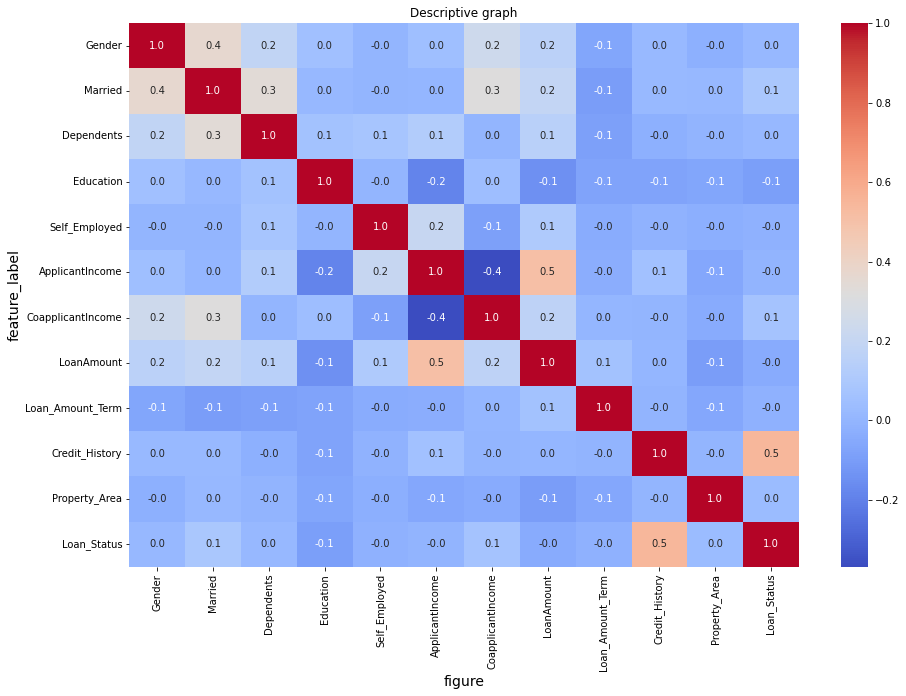

In [187]:
# Plotting the correlation on the graph. 
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

- The haetmap demonstrate the relation between the label and the features. 
- It also seen that most of the columns are not closely corelated. 

The highest correlation is 0.569764 between "Credit_History" and "Loan_Status", which is not on the higher side, therefore the multi colleanerity problem doesn't exist in the dataframe. 

In [188]:
#Seperating the features and the label. 
X1 = df1.drop('Loan_Status', axis=1)
Y1 = df1['Loan_Status']

In [189]:
# scaling the features.
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [190]:
X1_scaled.shape

(595, 11)

In [191]:
Y1.shape

(595,)

In [192]:
X1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5.768597,0.000000,5.845650,360,1,2
1,1,1,1,0,0,5.666179,9.149313,5.664964,360,1,0
2,1,1,0,0,1,5.482132,0.000000,4.798975,360,1,2
3,1,1,0,1,0,5.415221,9.845889,5.578787,360,1,2
4,1,0,0,0,0,5.779154,0.000000,5.794843,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,5.467063,0.000000,4.892417,360,1,0
610,1,1,3,0,0,5.619198,0.000000,4.172296,180,1,0
611,1,1,1,0,0,5.900037,6.473875,6.598067,360,1,2
612,1,1,2,0,0,5.874872,0.000000,6.178862,360,1,2


In [193]:
# Splitting the data in training the the testing data. 

In [194]:
Y1.value_counts()

1    408
0    187
Name: Loan_Status, dtype: int64

In [195]:
X1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [196]:
#We shall consider balancing the problem, as it is a classification problem 

In [197]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [198]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Resample the data
X1, Y1 = smote.fit_resample(X1, Y1)

In [199]:
Y1.value_counts()

1    408
0    408
Name: Loan_Status, dtype: int64

In [200]:
# Splitting the dataset into train and test 

In [201]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=22)
X1_train  

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
21,1,1,0,1,0,5.418175,9.516065,5.533673,360,0,1
558,1,1,0,0,0,5.494798,9.743733,5.746264,360,0,1
666,1,1,1,0,0,5.576996,10.039934,6.139674,360,1,2
622,1,1,2,0,0,5.693013,0.000000,5.520478,360,1,2
101,1,1,0,0,0,5.672526,10.514770,5.845650,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
502,1,1,0,1,0,5.492930,9.422915,5.611713,360,0,1
358,1,1,1,0,0,5.800917,0.000000,6.088002,360,1,1
356,1,0,0,0,0,5.400484,0.000000,5.283799,480,1,1
812,1,0,0,0,0,5.495842,9.596825,5.476850,180,0,2


In [202]:
def metric_score(clf, X1_train, X1_test, Y1_train, Y1_test, train):
    if train == True: 
        pred = clf.predict(X1_train)
        print("\n======================Train Result==========================")
        print(f"Accuracy Score : {accuracy_score(Y1_train, pred) * 100:.2f}%")
    elif train == False: 
        pred = clf.predict(X1_test)
        print("\n======================Test Result==========================")
        print(f"Accuracy Score : {accuracy_score(Y1_test, pred) * 100:.2f}%")
        print('\n \n Test Classification Report \n', classification_report(Y1_test, pred, digits=2))

In [203]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# training the model 
rf.fit(X1_train, Y1_train)

RandomForestClassifier()

In [204]:
metric_score(rf, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(rf, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 100.00%

======================Test Result==========================
Accuracy Score : 78.66%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        85
           1       0.74      0.85      0.79        79

    accuracy                           0.79       164
   macro avg       0.79      0.79      0.79       164
weighted avg       0.79      0.79      0.79       164



In [205]:
lr = LogisticRegression()

# training the model 
lr.fit(X1_train, Y1_train)

LogisticRegression()

In [206]:
metric_score(lr, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(lr, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 75.61%

======================Test Result==========================
Accuracy Score : 73.78%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.54      0.68        85
           1       0.66      0.95      0.78        79

    accuracy                           0.74       164
   macro avg       0.79      0.75      0.73       164
weighted avg       0.79      0.74      0.73       164



In [207]:
dt = DecisionTreeClassifier()

# training the model
dt.fit(X1_train, Y1_train)

DecisionTreeClassifier()

In [208]:
metric_score(dt, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(dt, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 100.00%

======================Test Result==========================
Accuracy Score : 73.17%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        85
           1       0.73      0.70      0.71        79

    accuracy                           0.73       164
   macro avg       0.73      0.73      0.73       164
weighted avg       0.73      0.73      0.73       164



In [209]:
# Gradient Boosting
gb = GradientBoostingClassifier()

# training the model
gb.fit(X1_train, Y1_train)

GradientBoostingClassifier()

In [210]:
metric_score(gb, X1_train, X1_test, Y1_train, Y1_test, train= True)
metric_score(gb, X1_train, X1_test, Y1_train, Y1_test, train= False)


======================Train Result==========================
Accuracy Score : 89.88%

======================Test Result==========================
Accuracy Score : 78.66%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.71      0.77        85
           1       0.73      0.87      0.80        79

    accuracy                           0.79       164
   macro avg       0.80      0.79      0.79       164
weighted avg       0.80      0.79      0.79       164



In [211]:
models = RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression']

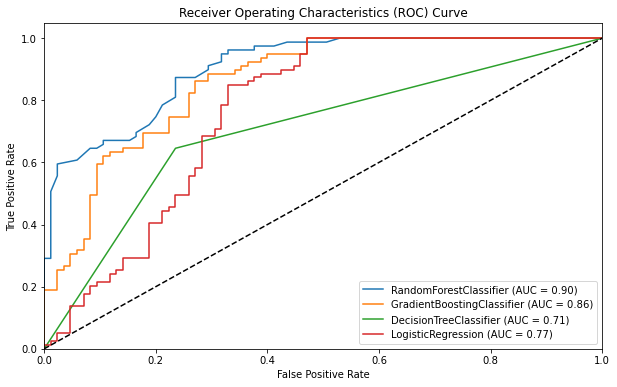

In [212]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = [RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()]

plt.figure(figsize=(10, 6))

for model in models:
    # Train the model
    model.fit(X1_train, Y1_train)

    # Predict probabilities
    probabilities = model.predict_proba(X1_test)[:, 1]

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(Y1_test, probabilities)
    auc_score = roc_auc_score(Y1_test, probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {auc_score:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [213]:
from sklearn.model_selection import cross_val_score

models = [RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()]

# For each model
for model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X1, Y1, cv=5)
    
    # Print cross-validation score for each model
    print(f'{type(model).__name__}: {scores.mean():.2f} +/- {scores.std():.2f}')


RandomForestClassifier: 0.81 +/- 0.06
GradientBoostingClassifier: 0.77 +/- 0.05
DecisionTreeClassifier: 0.75 +/- 0.02
LogisticRegression: 0.73 +/- 0.03


In [214]:

# Names of the models
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression']

# Cross-validation scores
cross_val_scores = [0.83, 0.75, 0.77, 0.73] # Replace these with your actual scores

# Standard Deviation scores
std_scores = [0.03, 0.03, 0.04, 0.03] # Replace these with your actual scores



# Create a dataframe
df = pd.DataFrame({
    'Model': model_names,
    'Cross_Val_Score': cross_val_scores,
    'Std_Score': std_scores
})

# Print the dataframe
print(df)

                        Model  Cross_Val_Score  Std_Score
0      RandomForestClassifier             0.83       0.03
1  GradientBoostingClassifier             0.75       0.03
2      DecisionTreeClassifier             0.77       0.04
3          LogisticRegression             0.73       0.03


In [215]:
#RandomForestClassifier :  0.83 is the best model.

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X1, Y1, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.75609756 0.75460123 0.86503067 0.79754601 0.88957055]
Average cross-validation score:  0.8125692054466557


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf = RandomForestClassifier(random_state=0)

# Define a grid of hyperparameter 'params_
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_rf.fit(X1_train, Y1_train)
print("Best parameters found: ", grid_rf.best_params_)
print("Best score found: ", grid_rf.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Get the best parameters
best_params = grid_rf.best_params_
print("Best parameters found: ", best_params)

# Get the best score
best_score = grid_rf.best_score_
print("Best score found: ", best_score)

In [ ]:
#Reffitting the model 
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X1_train, Y1_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels
Y1_pred = best_rf.predict(X1_test)

# Print accuracy score and classification report
print("Accuracy Score : ", accuracy_score(Y1_test, Y1_pred))
print("\nClassification Report : \n", classification_report(Y1_test, Y1_pred))

In [ ]:
# Organizinf  the data into a dictionary
data_Predict= {'Gender': [0], 
        'Married': [1], 
        'Dependents': [2],
        'Education': [1], 
        'Self_Employed': [0], 
        'ApplicantIncome': [5.42],
        'CoapplicantIncome': [9.50], 
        'LoanAmount': [5.45],
        'Loan_Amount_Term': [360], 
        'Credit_History': [1],
        'Property_Area': [0]}

df_pred = pd.DataFrame(data_Predict,index=[0])
df_pred

In [ ]:
# Predicting the result using the best model. 
new_pred = best_rf.predict(df_pred)
print(new_pred)

# The output suggest that the 1 - yes in the Loan application columns

In [ ]:
from joblib import dump, load

# saving the model. 
dump(best_rf, 'best_rf.joblib') 

# Loading the model
best_rf_from_joblib = load('best_rf.joblib') 

# using the loaded model to make predictions
best_rf_from_joblib.predict(X1_test)